# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
#from keras.preprocessing.image import ImageDataGenerator

2024-10-13 08:53:53.441538: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-13 08:53:53.521479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 08:53:53.553619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 08:53:53.563450: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 08:53:53.617055: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

training_set = train_datagen.flow_from_directory(
    'dataset/040/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    'dataset/040/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/home/prasad/tf-gpu/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1728806059.516087   11255 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728806059.595871   11255 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728806059.597902   11255 cuda_exe

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 32)

Epoch 1/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9065 - loss: 0.2321 - val_accuracy: 0.7960 - val_loss: 0.5526
Epoch 2/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9113 - loss: 0.2123 - val_accuracy: 0.7805 - val_loss: 0.6481
Epoch 3/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9053 - loss: 0.2216 - val_accuracy: 0.7955 - val_loss: 0.5660
Epoch 4/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9193 - loss: 0.1992 - val_accuracy: 0.8055 - val_loss: 0.5409
Epoch 5/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9238 - loss: 0.1998 - val_accuracy: 0.7870 - val_loss: 0.5596
Epoch 6/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9120 - loss: 0.2024 - val_accuracy: 0.7995 - val_loss: 0.5820
Epoch 7/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9256 - loss: 0.1857 - val_accuracy: 0.7980 - val_loss: 0.5692
Epoch 8/32
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9267 - loss: 0.1804 - val_accu

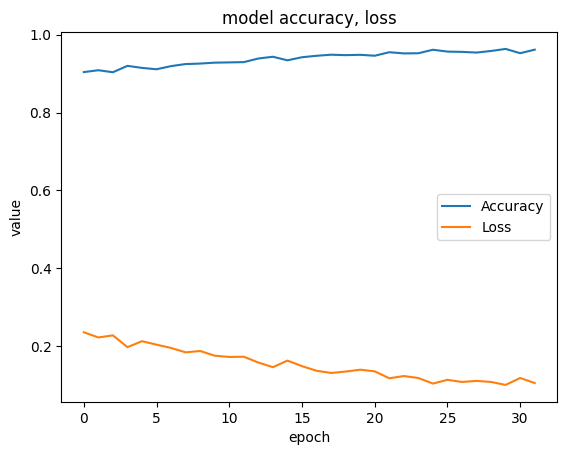

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy, loss')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])
plt.show()

## Part 4 - Making a single prediction

In [24]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/040/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] == 1:
  prediction = {'prediction': 'dog', 'result': result}
else:
  prediction = {'prediction': 'cat', 'result': result}

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
{'prediction': 'cat', 'result': array([[0.01609336]], dtype=float32)}
